# Imports

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import re
from sklearn.preprocessing import LabelEncoder
import joblib


# Data Statistics

In [ ]:
file_path = "C:/Users/chara/Desktop/PROJECTS/Commodity_price_prediction/Price_Agriculture_commodities_Week.csv"
df = pd.read_csv(file_path)
print("Shape (rows, columns):", df.shape)

Shape (rows, columns): (23093, 10)


In [45]:
df[['Min_Price', 'Max_Price', 'Modal_Price']].describe()

,Min_Price,Max_Price,Modal_Price
count,23093.000000,23093.000000,23093.000000
mean,4187.077045,4976.034260,4602.917742
std,5472.783385,6277.308057,5843.822711
min,0.000000,0.000000,0.830000
25%,1750.000000,2000.000000,1955.000000
50%,2725.000000,3400.000000,3000.000000
75%,5000.000000,6000.000000,5500.000000
max,223500.000000,227500.000000,225500.000000


In [46]:
df.isna().sum()

State           0
District        0
Market          0
Commodity       0
Variety         0
Grade           0
Arrival_Date    0
Min_Price       0
Max_Price       0
Modal_Price     0
dtype: int64

In [47]:
for col in ["State","District","Market","Commodity","Variety","Grade"]:
    print(f"{col}: {df[col].nunique()}")

State: 27
District: 403
Market: 1289
Commodity: 234
Variety: 452
Grade: 4


# Exploratory Data Analytics (EDA)
* Data analytics
* Data Cleaning
* Data Visualization

In [ ]:
# Standardize column names to lowercase snake_case
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

df.head(2)

,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,27-07-2023,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,27-07-2023,2200.0,3000.0,2450.0


In [ ]:
# Convert arrival_date to datetime format
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')

# Check conversion result
print(df['arrival_date'].dtype)
df[['arrival_date']].head(5)


datetime64[ns]


C:\Users\chara\AppData\Local\Temp\ipykernel_4772\688093235.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')


,arrival_date
0,2023-07-27
1,2023-07-27
2,2023-07-27
3,2023-07-27
4,2023-07-27


In [ ]:
# Replace 0 values in price columns with NaN (treat as missing)
price_cols = ['min_price', 'max_price', 'modal_price']
df[price_cols] = df[price_cols].replace(0, pd.NA)

# Check missing values again
df[price_cols].isna().sum()

min_price      20
max_price      28
modal_price     0
dtype: int64

In [ ]:
# Remove outliers where price > 3x the 99th percentile
# This keeps extreme but realistic values, removes data-entry errors
for col in price_cols:
    threshold = df[col].quantile(0.99) * 3
    df = df[df[col] <= threshold]

# Check new summary statistics
df[price_cols].describe()


,modal_price
count,23040.000000
mean,4526.906268
std,5084.586082
min,0.830000
25%,1950.000000
50%,3000.000000
75%,5500.000000
max,68000.000000


In [ ]:
# Check for duplicate rows
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Drop duplicates
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)

Number of duplicate rows: 0
Shape after dropping duplicates: (23040, 10)


In [ ]:
# Final sanity check
print("Shape:", df.shape)
print("\nMissing values:\n", df.isna().sum())
print("\nDate range:", df['arrival_date'].min(), "to", df['arrival_date'].max())
df.head()


Shape: (23040, 10)

Missing values:
 state           0
district        0
market          0
commodity       0
variety         0
grade           0
arrival_date    0
min_price       0
max_price       0
modal_price     0
dtype: int64

Date range: 2023-07-27 00:00:00 to 2023-08-02 00:00:00


,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price
0,Gujarat,Amreli,Damnagar,Bhindi(Ladies Finger),Bhindi,FAQ,2023-07-27,4100.0,4500.0,4350.0
1,Gujarat,Amreli,Damnagar,Brinjal,Other,FAQ,2023-07-27,2200.0,3000.0,2450.0
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,2023-07-27,2350.0,3000.0,2700.0
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,2023-07-27,7000.0,7500.0,7250.0
4,Gujarat,Amreli,Damnagar,Coriander(Leaves),Coriander,FAQ,2023-07-27,8400.0,9000.0,8850.0


In [ ]:
# Set universal style
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

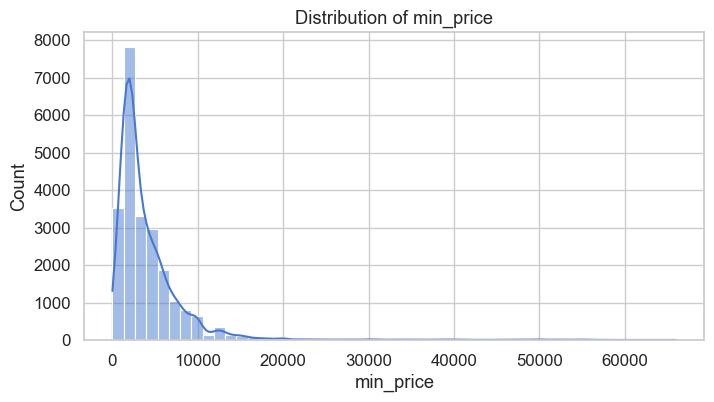

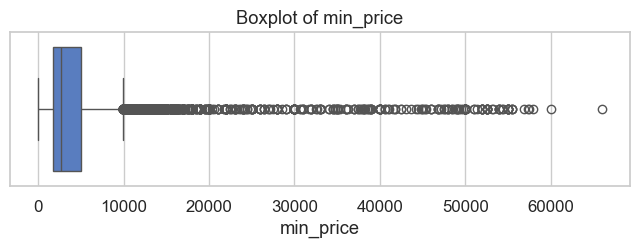

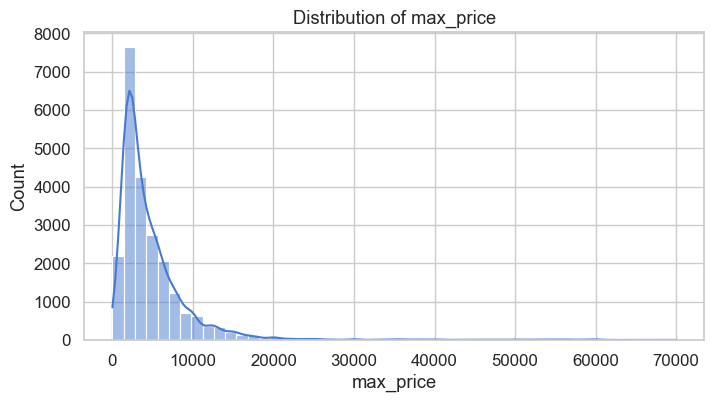

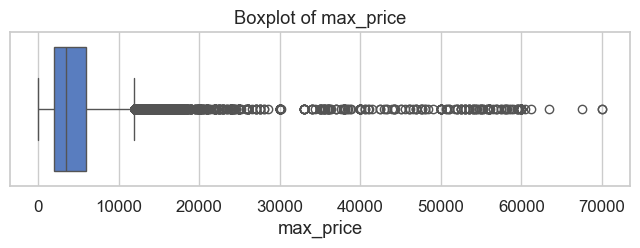

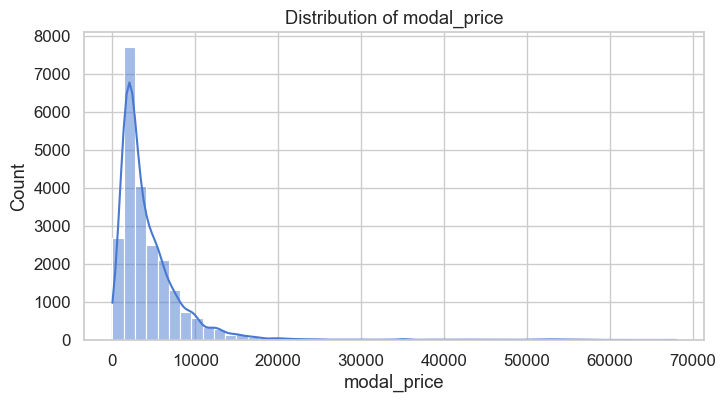

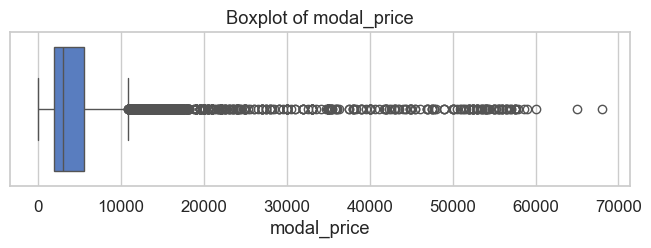

In [ ]:
# Distribution of prices
price_cols = ['min_price', 'max_price', 'modal_price']

for col in price_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Boxplot for outlier check
    plt.figure(figsize=(8,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()


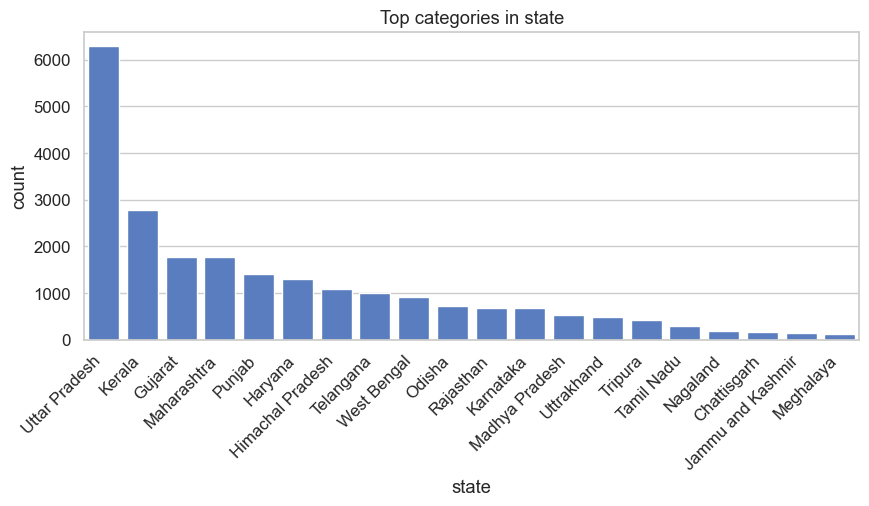

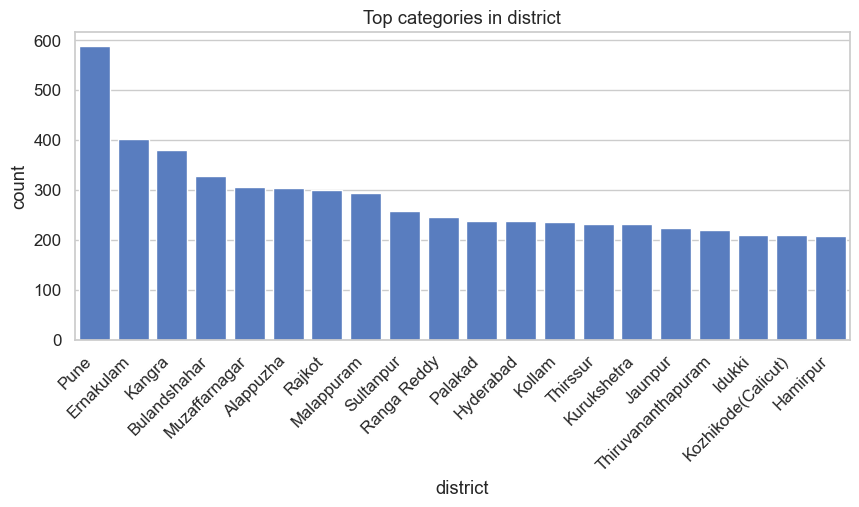

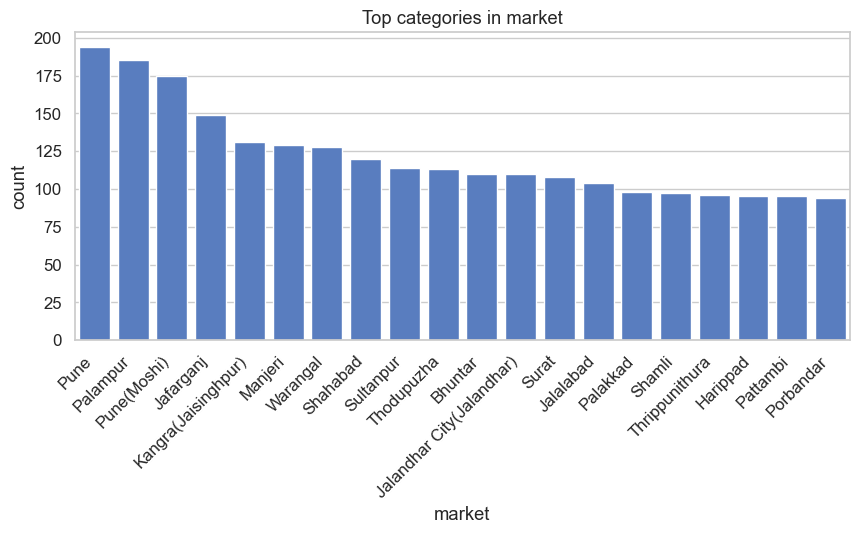

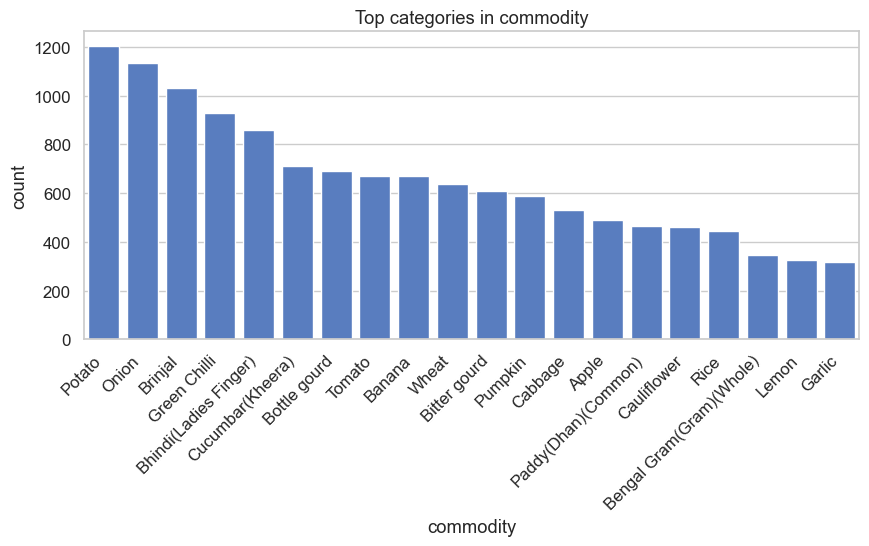

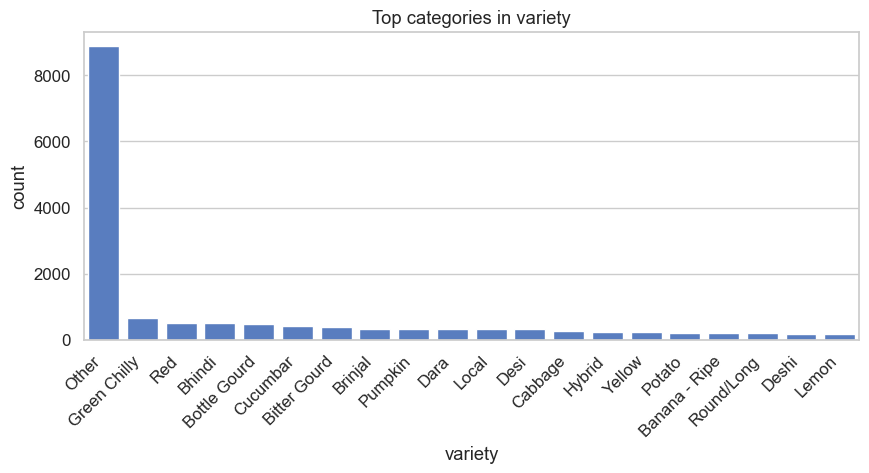

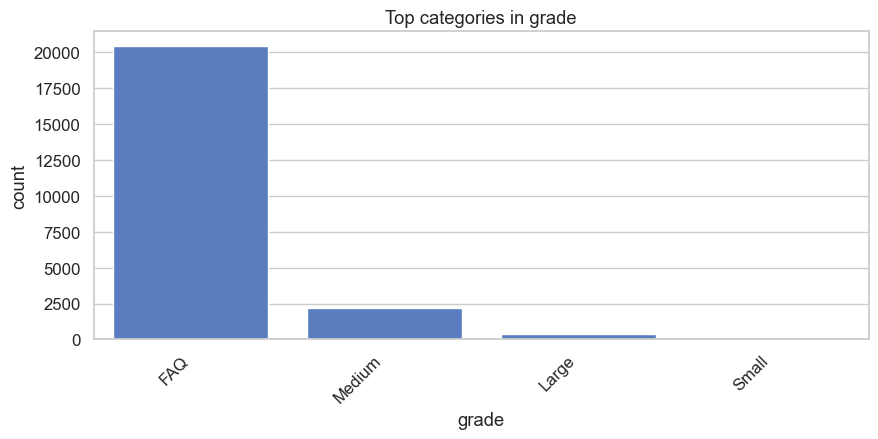

In [ ]:
# Bar plots for categorical columns
categorical_cols = ['state', 'district', 'market', 'commodity', 'variety', 'grade']

for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index[:20])  # top 20 categories
    plt.title(f"Top categories in {col}")
    plt.xticks(rotation=45, ha='right')
    plt.show()


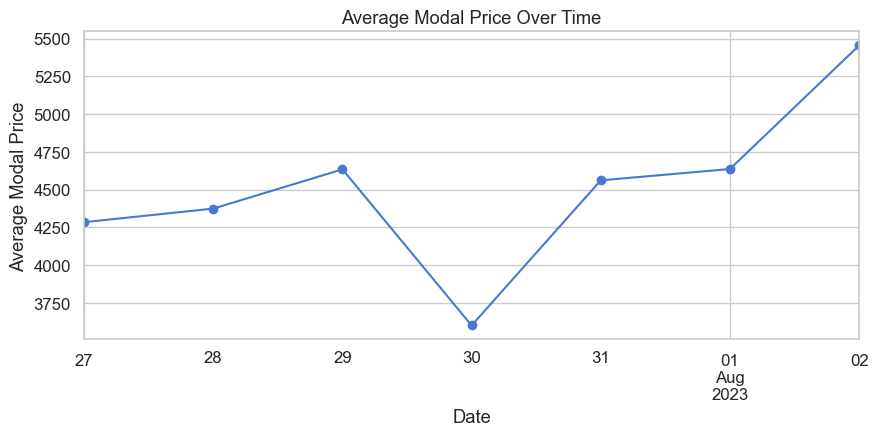

In [ ]:
# Average modal price per date
avg_price_by_date = df.groupby('arrival_date')['modal_price'].mean()

plt.figure(figsize=(10,4))
avg_price_by_date.plot(marker='o')
plt.title("Average Modal Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Modal Price")
plt.grid(True)
plt.show()


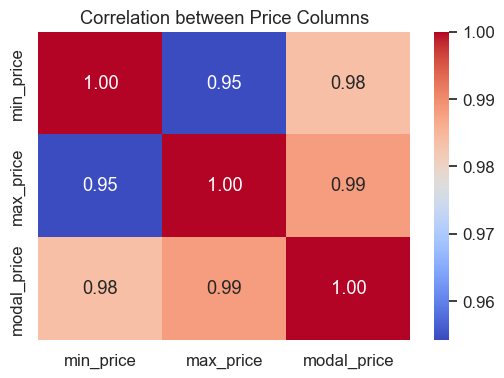

In [ ]:
# Correlation heatmap between price columns
plt.figure(figsize=(6,4))
sns.heatmap(df[price_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between Price Columns")
plt.show()

In [59]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'grade',
       'arrival_date', 'min_price', 'max_price', 'modal_price'],
      dtype='object')

In [60]:
df['arrival_date'] = pd.to_datetime(df['arrival_date'], errors='coerce')
print(df['arrival_date'].isna().sum())   # any invalid dates?
df = df.dropna(subset=['arrival_date'])  # drop rows where date is missing


0


In [ ]:
num_cols = ['min_price', 'max_price', 'modal_price']
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')
df = df.dropna(subset=num_cols)

In [ ]:
df = df[(df['modal_price'] > 0) & (df['max_price'] > 0) & (df['min_price'] > 0)]

In [ ]:
df = df[df['min_price'] <= df['modal_price']]
df = df[df['modal_price'] <= df['max_price']]

In [64]:
df.state.unique()

array(['Gujarat', 'Haryana', 'Himachal Pradesh', 'Kerala', 'Nagaland',
       'Odisha', 'Punjab', 'Rajasthan', 'Tripura', 'Uttar Pradesh',
       'Uttrakhand', 'Andhra Pradesh', 'Bihar', 'Chandigarh',
       'Chattisgarh', 'Jammu and Kashmir', 'Karnataka', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'NCT of Delhi', 'Pondicherry',
       'Tamil Nadu', 'Telangana', 'West Bengal', 'Goa',
       'Andaman and Nicobar'], dtype=object)

In [65]:
state_corrections = {
    'Uttrakhand': 'Uttarakhand',
    'Chattisgarh': 'Chhattisgarh',
    'Pondicherry': 'Puducherry',
    'NCT of Delhi': 'Delhi'
}

df['state'] = df['state'].replace(state_corrections)


In [66]:
df.district.unique()

array(['Amreli', 'Gurgaon', 'Kangra', 'Alappuzha', 'Kohima', 'Dhenkanal',
       'Amritsar', 'Chittorgarh', 'Rajasamand', 'North Tripura',
       'Baghpat', 'Bulandshahar', 'Hathras', 'Meerut', 'Dehradoon',
       'Haridwar', 'Chittor', 'Cuddapah', 'East Godavari', 'Guntur',
       'Kurnool', 'Visakhapatnam', 'Kishanganj', 'Chandigarh',
       'Balodabazar', 'Bijapur', 'Bilaspur', 'Dhamtari', 'Kabirdham',
       'Kanker', 'Koria', 'Mungeli', 'Raigarh', 'Raipur', 'Rajnandgaon',
       'Surajpur', 'Banaskanth', 'Bharuch', 'Botad', 'Dahod',
       'Gandhinagar', 'Jamnagar', 'Junagarh', 'Mehsana', 'Morbi',
       'Navsari', 'Patan', 'Porbandar', 'Rajkot', 'Sabarkantha', 'Surat',
       'Surendranagar', 'Vadodara(Baroda)', 'Ambala', 'Bhiwani',
       'Fatehabad', 'Hissar', 'Jind', 'Kaithal', 'Kurukshetra',
       'Mahendragarh-Narnaul', 'Mewat', 'Palwal', 'Panchkula', 'Panipat',
       'Rewari', 'Rohtak', 'Sirsa', 'Sonipat', 'Yamuna Nagar', 'Chamba',
       'Hamirpur', 'Kullu', 'Mandi', 'Sh

In [ ]:
df['district'] = df['district'].astype(str).str.strip().str.title()

df['district'] = df['district'].apply(lambda x: re.sub(r"\(.*?\)", "", x).strip())
district_corrections = {
    'Dehradoon': 'Dehradun',
    'Bulandshahar': 'Bulandshahr',
    'Jhajar': 'Jhajjar',
    'Nanital': 'Nainital',
    'Udhamsinghnagar': 'Udham Singh Nagar',
    'Chitrakut': 'Chitrakoot',
    'Vadodara Baroda': 'Vadodara',
    'Kozhikode Calicut': 'Kozhikode',
    'Nagercoil Kannyiakumari': 'Kanyakumari',
    'Ropar Rupnagar': 'Rupnagar',
    'Medinipur W': 'West Medinipur',
    'Medinipur E': 'East Medinipur',
    'Jalaun Orai': 'Jalaun',
    'Mau Maunathbhanjan': 'Mau',
    'Garhwal Pauri': 'Pauri Garhwal',
    'Karwar Uttar Kannad': 'Uttara Kannada',
    'Mangalore Dakshin Kannad': 'Dakshina Kannada',
    'Kapurthala': 'Kapurthala'
}
df['district'] = df['district'].replace(district_corrections)


In [68]:
df.commodity.unique()

array(['Bhindi(Ladies Finger)', 'Brinjal', 'Cabbage', 'Cauliflower',
       'Coriander(Leaves)', 'Ginger(Green)', 'Green Chilli', 'Guar',
       'Lemon', 'Tomato', 'Apple', 'Banana', 'Beetroot', 'Bitter gourd',
       'Bottle gourd', 'Capsicum', 'Carrot', 'Colacasia',
       'Cucumbar(Kheera)', 'French Beans (Frasbean)', 'Garlic', 'Guava',
       'Jack Fruit', 'Mango', 'Mashrooms', 'Mousambi(Sweet Lime)',
       'Onion', 'Papaya', 'Pear(Marasebu)', 'Peas Wet', 'Pineapple',
       'Plum', 'Potato', 'Pumpkin', 'Raddish', 'Spinach', 'Sponge gourd',
       'Tinda', 'Amaranthus', 'Amphophalus', 'Ashgourd', 'Banana - Green',
       'Cowpea(Veg)', 'Drumstick', 'Leafy Vegetable',
       'Pointed gourd (Parval)', 'Ridgeguard(Tori)', 'Snakeguard',
       'Wheat', 'Rice', 'Masur Dal', 'Pomegranate', 'Groundnut',
       'Turmeric', 'Paddy(Dhan)(Common)', 'Black Gram (Urd Beans)(Whole)',
       'Jowar(Sorghum)', 'Maize', 'Bengal Gram(Gram)(Whole)',
       'Gur(Jaggery)', 'Tamarind Seed', 'Lak(Teora

In [ ]:
# Clean commodity names
def clean_commodity_name(name):
    if pd.isna(name):
        return name
    # Remove text inside parentheses
    name = pd.Series(name).str.replace(r"\(.*?\)", "", regex=True).iloc[0]
    # Strip spaces & normalize casing
    name = name.strip().title()
    return name

df["commodity"] = df["commodity"].apply(clean_commodity_name)

# Map alternate names to standard ones 
commodity_mapping = {
    "Bhindi": "Ladies Finger",
    "Brinjal": "Eggplant",
    "Chilly Capsicum": "Capsicum",
    "Chili Red": "Red Chilli",
    "Onion Green": "Onion",
    "Banana - Green": "Banana",
    "Mango Raw-Ripe": "Mango",
    "Papaya Raw": "Papaya",
    "Turmeric Raw": "Turmeric",
    "Paddy Dhan Common": "Paddy",
    "Paddy Dhan Basmati": "Paddy"
}

df["commodity"] = df["commodity"].replace(commodity_mapping)

# Categorize
def categorize_commodity(x):
    vegetables = [
        "Tomato","Potato","Onion","Cabbage","Eggplant","Ladies Finger",
        "Carrot","Cauliflower","Spinach","Coriander","Green Chilli","Capsicum",
        "Pumpkin","Bottle Gourd","Bitter Gourd","Ridgeguard","Cucumber"
    ]
    fruits = [
        "Apple","Mango","Banana","Papaya","Grapes","Pineapple","Orange",
        "Guava","Water Melon","Mousambi","Pear","Pomegranate"
    ]
    pulses = [
        "Masur Dal","Moong Dal","Chana Dal","Urad Dal","Arhar Dal",
        "Peas Dry","Lentil Masur","White Peas"
    ]
    grains = [
        "Wheat","Rice","Paddy","Jowar","Maize","Bajra","Barley","Ragi"
    ]
    livestock = [
        "Goat","Cow","Bull","Sheep","Buffalo","Ox","Calf","Duck","Cock","Hen","Egg"
    ]
    flowers = [
        "Rose","Marigold","Jasmine","Lotus","Carnation","Chrysanthemum","Gladiolus"
    ]

    if x in vegetables: return "Vegetable"
    elif x in fruits: return "Fruit"
    elif x in pulses: return "Pulse"
    elif x in grains: return "Grain"
    elif x in livestock: return "Livestock"
    elif x in flowers: return "Flower"
    else: return "Other"

df["commodity_category"] = df["commodity"].apply(categorize_commodity)

# Quick Check
print(df[["commodity", "commodity_category"]].head(20))

        commodity commodity_category
0   Ladies Finger          Vegetable
1        Eggplant          Vegetable
2         Cabbage          Vegetable
3     Cauliflower          Vegetable
4       Coriander          Vegetable
5          Ginger              Other
6    Green Chilli          Vegetable
7            Guar              Other
8           Lemon              Other
9          Tomato          Vegetable
10          Apple              Fruit
11          Apple              Fruit
12          Apple              Fruit
13         Banana              Fruit
14       Beetroot              Other
15  Ladies Finger          Vegetable
16   Bitter Gourd          Vegetable
17   Bottle Gourd          Vegetable
18       Eggplant          Vegetable
19        Cabbage          Vegetable


In [ ]:
for col in ["state", "district", "market"]:
    df[col] = df[col].str.strip().str.title()

In [ ]:
df["year"] = df["arrival_date"].dt.year
df["month"] = df["arrival_date"].dt.month
df["day"] = df["arrival_date"].dt.day
df["dayofweek"] = df["arrival_date"].dt.dayofweek

# Label Encoding for Machine Learning

In [ ]:
# Categorical columns to encode
cat_cols = ["state", "district", "market", "commodity", "commodity_category"]

# Dictionary to store encoders
encoders = {}

for col in cat_cols:
    le = LabelEncoder()
    df[col] = df[col].astype(str)  # ensure string
    df[col + "_encoded"] = le.fit_transform(df[col])
    
    # Save encoder
    joblib.dump(le, f"{col}_encoder.pkl")
    
    encoders[col] = le

print("Encoding complete. Encoders saved as .pkl files.")

Encoding complete. Encoders saved as .pkl files.


In [ ]:
# Load encoder
state_encoder = joblib.load("state_encoder.pkl")

# Example input from Flask form
input_state = "Gujarat"

# Safe transform
if input_state in state_encoder.classes_:
    state_encoded = state_encoder.transform([input_state])[0]
else:
    state_encoded = -1  # unseen category

print("Encoded state:", state_encoded)

Encoded state: 7


In [ ]:
df

,state,district,market,commodity,variety,grade,arrival_date,min_price,max_price,modal_price,commodity_category,year,month,day,dayofweek,state_encoded,district_encoded,market_encoded,commodity_encoded,commodity_category_encoded
0,Gujarat,Amreli,Damnagar,Ladies Finger,Bhindi,FAQ,2023-07-27,4100.0,4500.0,4350.0,Vegetable,2023,7,27,3,7,12,308,112,6
1,Gujarat,Amreli,Damnagar,Eggplant,Other,FAQ,2023-07-27,2200.0,3000.0,2450.0,Vegetable,2023,7,27,3,7,12,308,66,6
2,Gujarat,Amreli,Damnagar,Cabbage,Cabbage,FAQ,2023-07-27,2350.0,3000.0,2700.0,Vegetable,2023,7,27,3,7,12,308,28,6
3,Gujarat,Amreli,Damnagar,Cauliflower,Cauliflower,FAQ,2023-07-27,7000.0,7500.0,7250.0,Vegetable,2023,7,27,3,7,12,308,35,6
4,Gujarat,Amreli,Damnagar,Coriander,Coriander,FAQ,2023-07-27,8400.0,9000.0,8850.0,Vegetable,2023,7,27,3,7,12,308,51,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23088,Uttarakhand,Haridwar,Roorkee,Mango,Other,Medium,2023-08-02,800.0,1200.0,1000.0,Fruit,2023,8,2,2,25,144,1025,127,1
23089,Uttarakhand,Haridwar,Roorkee,Mousambi,Other,Medium,2023-08-02,1500.0,2500.0,2000.0,Fruit,2023,8,2,2,25,144,1025,136,1
23090,Uttarakhand,Haridwar,Roorkee,Pear,Other,Medium,2023-08-02,2000.0,3000.0,2500.0,Fruit,2023,8,2,2,25,144,1025,150,1
23091,Uttarakhand,Haridwar,Roorkee,Potato,Other,FAQ,2023-08-02,900.0,1800.0,1500.0,Vegetable,2023,8,2,2,25,144,1025,160,6


In [75]:
df.columns

Index(['state', 'district', 'market', 'commodity', 'variety', 'grade',
       'arrival_date', 'min_price', 'max_price', 'modal_price',
       'commodity_category', 'year', 'month', 'day', 'dayofweek',
       'state_encoded', 'district_encoded', 'market_encoded',
       'commodity_encoded', 'commodity_category_encoded'],
      dtype='object')

In [ ]:
# Define features to keep
feature_cols = [
    'state_encoded', 'district_encoded', 'market_encoded',
    'commodity_encoded', 'commodity_category_encoded',
    'year', 'month', 'day', 'dayofweek'
]

# Target column
target_col = 'modal_price'

# Create final dataframe
final_df = df[feature_cols + [target_col]].copy()

# Save to CSV
final_df.to_csv("final_dataset.csv", index=False)

print("Final dataset created and saved as final_dataset.csv")
print("Shape:", final_df.shape)
final_df.head()

✅ Final dataset created and saved as final_dataset.csv
Shape: (23040, 10)


,state_encoded,district_encoded,market_encoded,commodity_encoded,commodity_category_encoded,year,month,day,dayofweek,modal_price
0,7,12,308,112,6,2023,7,27,3,4350.0
1,7,12,308,66,6,2023,7,27,3,2450.0
2,7,12,308,28,6,2023,7,27,3,2700.0
3,7,12,308,35,6,2023,7,27,3,7250.0
4,7,12,308,51,6,2023,7,27,3,8850.0
